## Machine Learning Model for Predicting School Admissions from an Indian Perspective



### About this dataset

#### Context 
This dataset is created for prediction of Graduate Admissions from an Indian perspective.

#### Content  
The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

GRE Scores ( out of 340 )  
TOEFL Scores ( out of 120 )  
University Rating ( out of 5 )  
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )  
Undergraduate GPA ( out of 10 )  
Research Experience ( either 0 or 1 )  
Chance of Admit ( ranging from 0 to 1 )  

#### Acknowledgements  
This dataset is inspired by the UCLA Graduate Dataset. The test scores and GPA are in the older format.
The dataset is owned by Mohan S Acharya.

#### Inspiration  
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

#### Citation  
Please cite the following if you are interested in using the dataset :
Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

I would like to thank all of you for contributing to this dataset through discussions and questions. I am in awe of the number of kernels built on this dataset. Some results and visualisations are fantastic and makes me a proud owner of the dataset. Keep em' coming! Thank You.

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# Read dataset and display columns

In [2]:
admit_data = pd.read_csv("Admission_Predict.csv")
admit_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


# Examine basic statistics of the data

In [3]:
admit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


### Looking at the table above we see that we have 400 entries and no missing data

In [4]:
cols = admit_data.columns.tolist()
print(cols)

['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


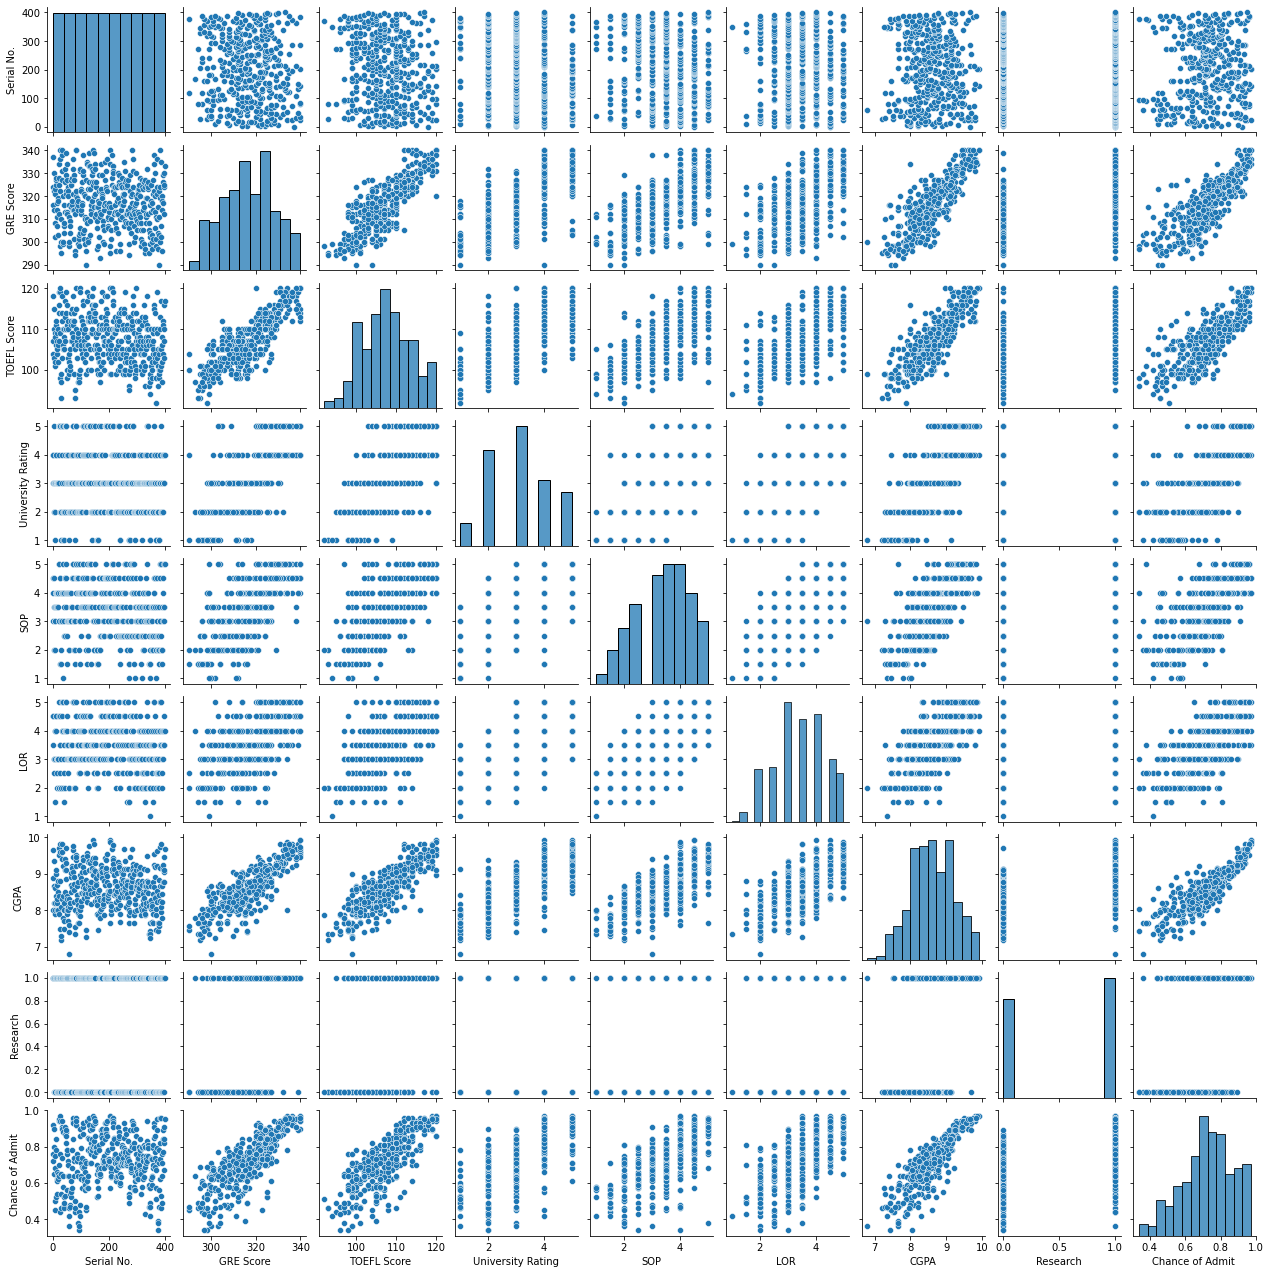

In [5]:
sns.pairplot(admit_data[cols], height=2.0)

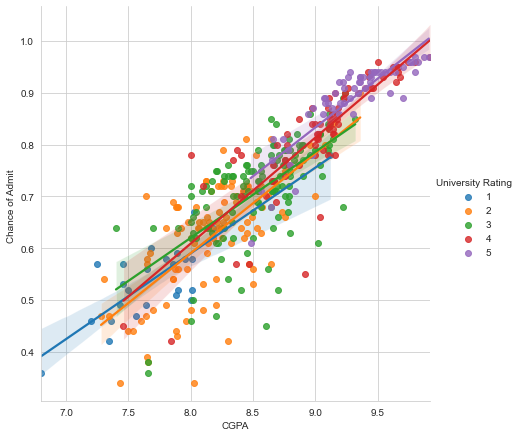

In [6]:
sns.set_style('whitegrid')
sns.lmplot(x='CGPA', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


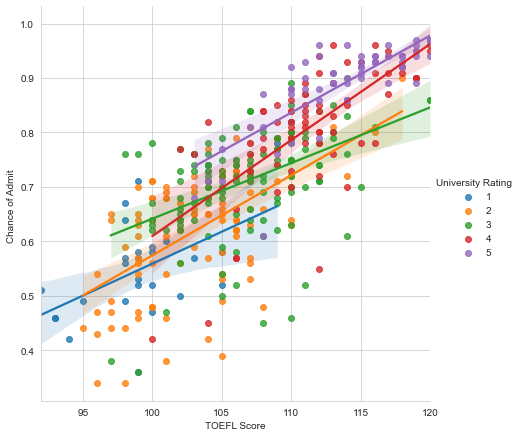

In [7]:

sns.lmplot(x='TOEFL Score', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


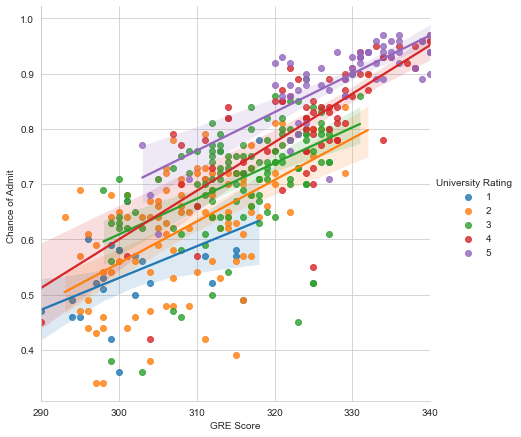

In [8]:

sns.lmplot(x='GRE Score', y='Chance of Admit ', hue='University Rating', data=admit_data, height=6)


# Observations for examination of statistics  

Looking at the Chance of Admission row we see a strong corelation between test scores, statement of purpose, and letter of recomendation, but less of a corelation with research experience.  

The histogram at the end of the row shows the typical chance of admission to be about 70% with more weight toward the higher chance of admission.  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with either standadization or normalization before our regression model is built.

#### Probablility Distribution of Admissions

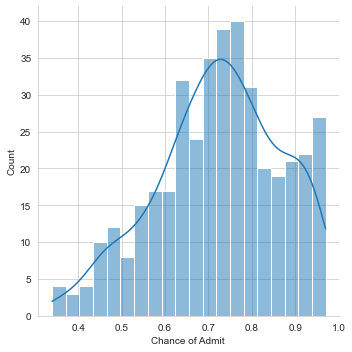

In [9]:
sns.displot(admit_data['Chance of Admit '], bins=20, kde=True)
plt.show()

#### Distribution  of School Ratings

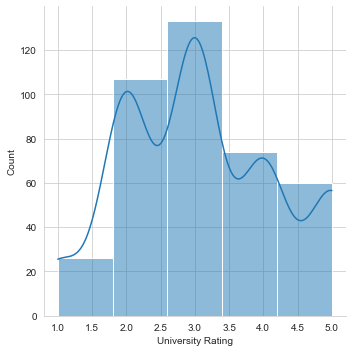

In [10]:
sns.displot(admit_data['University Rating'], bins=5, kde=True)
plt.show()

# Pandas Profiling Report for Data

In [11]:
profile = ProfileReport(admit_data, title="Pandas Profiling Report")
profile.to_widgets()
profile.to_file('Admission Predictions Profile Report.html')

# Variable Selection for Predictive Modeling

## Calculation of covariance matrix

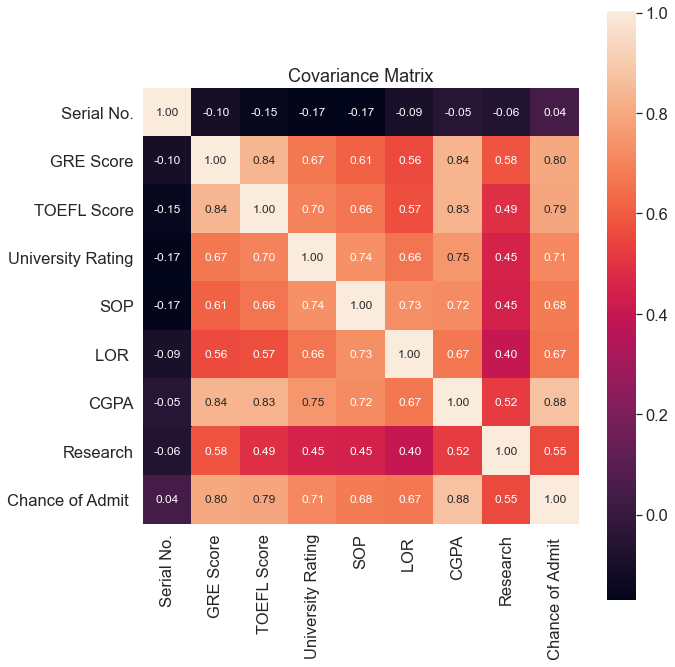

In [12]:
stdsc = StandardScaler()
X_std = stdsc.fit_transform(admit_data[cols].iloc[:,range(0,9)].values)
cov_mat = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance Matrix')
plt.tight_layout()
plt.show()

### Selecting Important Variables  

From the covariance matrix above we the the Admit variable correlats the strongest with the variables: CGPA, GRE Score and TOEFL Score, and less with the variables: University Rating, SOP and LOR.

In [13]:
cols_selected = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Chance of Admit ']
admit_data[cols_selected].head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65


In [14]:
admit_data_X = admit_data[cols_selected].iloc[:,0:8].values     # Features Matrix
admit_data_y = admit_data[cols_selected]['Chance of Admit ']    # Target Variable

In [15]:
admit_data_X.shape

(400, 7)

In [16]:
admit_data_y.shape

(400,)

### Scaling the X Data  

Our data is on different scales, with the lower scales as 1 to 5 and the higher upto 0 to 340, the variables will have to be brought to the same scale with standadization. This will center to the mean and scale to unit variance.

In [17]:
admit_X_scaled = scale(admit_data_X)
admit_X_scaled

array([[ 1.76210664,  1.74697064,  0.79882862, ...,  1.16732114,
         1.76481828,  1.37364801],
       [ 0.62765641, -0.06763531,  0.79882862, ...,  1.16732114,
         0.45515126,  0.25029671],
       [-0.07046681, -0.56252785, -0.07660001, ...,  0.05293342,
        -1.00563118, -0.03054111],
       ...,
       [ 1.15124883,  1.41704229,  0.79882862, ...,  1.16732114,
         1.42900622,  1.30343855],
       [-0.41952842, -0.72749202, -0.07660001, ...,  0.61012728,
         0.30403584, -0.38158839],
       [ 1.41304503,  1.58200646,  0.79882862, ...,  0.61012728,
         1.78160888,  1.58427637]])

#### Verify the scaling  

We can test to see that the scaling centered to the mean.

In [18]:
admit_X_scaled.mean().round(2)

0.0

#### Check for Standard Deviation  

We'll perform a similar check using panda's std() method.

In [19]:
admit_X_scaled.std(ddof=0)

1.0

#### Calculate the PCA Transformation  

Fit the PCA transfromation using the scaled data.

In [20]:
admit_pca = PCA().fit(admit_X_scaled)

Plot the cumulative variance ratio with number of components.

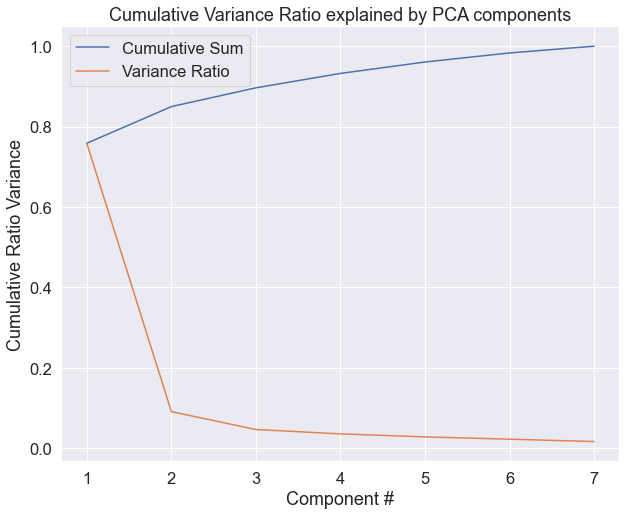

In [21]:
plt.subplots(figsize=(10,8))
plt.plot(admit_pca.explained_variance_ratio_.cumsum())
plt.plot(admit_pca.explained_variance_ratio_)
plt.xlabel('Component #')
plt.xticks([0, 1, 2, 3, 4, 5, 6,],['1', '2', '3', '4', '5', '6', '7'])
plt.ylabel('Cumulative Ratio Variance')
plt.title('Cumulative Variance Ratio explained by PCA components')
plt.legend(['Cumulative Sum', 'Variance Ratio']);

Looking at the plot above we can see that the first two Principle Components  account for about 85% of our variance in the Cumulative Sum. We can also see that there is a distinct 'elbow' the plot of variance ratio between component 2 and 3, telling us that components 3 thru 7 are much less important than components 1 and 2. 

# Linear Regression Ordinary Least Squares

In [22]:
# Check data shapes
admit_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [23]:
# Choose X and Y data sets
X = admit_data.drop(['Serial No.', 'Chance of Admit '], axis=1)
y = admit_data['Chance of Admit ']
# Check Shapes
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [24]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [26]:
# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(268, 7) (132, 7)
(268,) (132,)


In [27]:
import statsmodels.api as sm

# Create the model
rModel = sm.OLS(y_train, X_train)

# Fit the model
rModel_fit = rModel.fit()

# Evaluate the model
rModel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              3887.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                   7.43e-260
Time:                        18:08:26   Log-Likelihood:                          323.79
No. Observations:                 268   AIC:                                     -633.6
Df Residuals:                     261   BIC:                                     -608.5
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0031      0.001     -5.902      0.000      -0.004      -0.002
TOEFL Score           0.0035      0.001      2.350      0.020       0.001       0.006
University Rating     0.0185      0.006      2.935      0.004       0.006       0.031
SOP                  -0.0007      0.008     -0.082      0.935      -0.016       0.015
LOR                   0.0228      0.008      2.915      0.004       0.007       0.038
CGPA                  0.1351      0.017      8.126      0.000       0.102       0.168
Research              0.0551      0.010      5.393      0.000       0.035       0.075
==============================================================================
Omnibus:                       47.717   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.862
Skew:                          -1.023   Prob(JB):                     3.36e-17
Kurtosis:                       4.615   Cond. No.                     1.27e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel_fit.predict(X_test)

# Combine the predictions and actual values into a data frame
pred_act = pd.DataFrame(y_test)
pred_act['Predicted Admit'] = y_pred
pred_act['Difference'] = (pred_act['Chance of Admit '] - pred_act['Predicted Admit']).round(2)
pred_act.sample(20)

,Chance of Admit,Predicted Admit,Difference
26,0.76,0.749451,0.01
53,0.72,0.673281,0.05
259,0.90,0.888720,0.01
313,0.67,0.632052,0.04
79,0.46,0.478659,-0.02
278,0.66,0.675006,-0.02
103,0.57,0.658543,-0.09
116,0.56,0.734631,-0.17
48,0.82,0.815655,0.00
340,0.75,0.734862,0.02


In [42]:
pred_act.Difference.mean()

AttributeError: 'DataFrame' object has no attribute 'Difference'

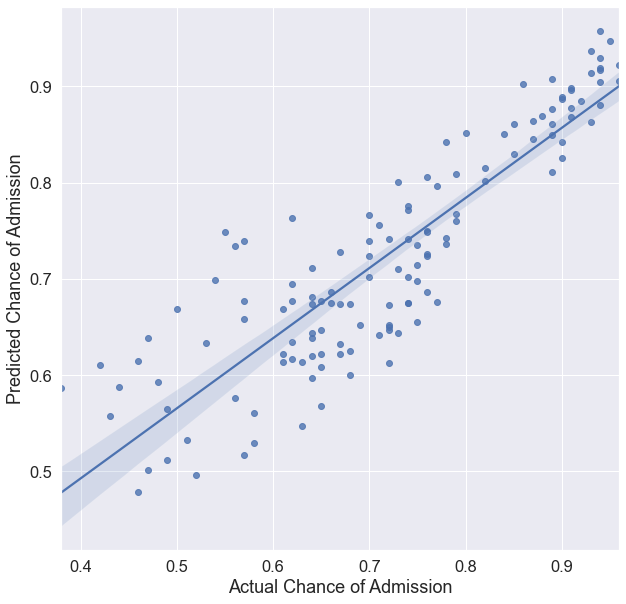

In [30]:
plt.figure(figsize=(10,10))
sns.regplot(x='Chance of Admit ', y='Predicted Admit', data=pred_act)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission');

### Check the Root Mean Squared Error

he RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions. 

In [31]:
# Define a function to check the RMSE.
import math
from sklearn.metrics import mean_squared_error, r2_score 

def rmse(actual, predicted):
    return math.sqrt(mean_squared_error(actual, predicted))

round(rmse(pred_act['Chance of Admit '], pred_act['Predicted Admit']),4)

0.0681

## Lasso

In [32]:
from sklearn import linear_model

# Create the model
reg = linear_model.Lasso(alpha=0.1)

# Fit the model
reg_fit = reg.fit(X_train, y_train)

# Evaluate the model
print('Parameter vector:',reg_fit.coef_)
print('Independent term in decision fuction:',reg_fit.intercept_)

# Predict
y_pred_lasso = reg.predict(X_test)

# Return R^2
print('Coefficienct of determination R^2 of the prediction:',reg.score(X_test, y_test))

Parameter vector: [0.00723644 0.0044546  0.         0.         0.         0.
 0.        ]
Independent term in decision fuction: -2.0482136946109257
Coefficienct of determination R^2 of the prediction: 0.7060756844625538


The coefficient __R^2__ is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

## Using less data

In [33]:
admit_data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [34]:
# Choose X and Y data sets
X = admit_data[['GRE Score', 'TOEFL Score', 'CGPA']]
y = admit_data[['Chance of Admit ']]

# Check Shapes
X.head()

,GRE Score,TOEFL Score,CGPA
0,337,118,9.65
1,324,107,8.87
2,316,104,8.00
3,322,110,8.67
4,314,103,8.21


In [35]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [36]:
# Splitting the data
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

# Check shapes
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(268, 3) (132, 3)
(268, 1) (132, 1)


In [37]:
import statsmodels.api as sm

# Create the model
rModel = sm.OLS(y_train, X_train)

# Fit the model
rModel_fit = rModel.fit()

# Evaluate the model
rModel_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Chance of Admit    R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              6691.
Date:                Tue, 29 Dec 2020   Prob (F-statistic):                   2.19e-249
Time:                        18:08:27   Log-Likelihood:                          284.42
No. Observations:                 268   AIC:                                     -562.8
Df Residuals:                     265   BIC:                                     -552.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GRE Score      -0.0049      0.001     -9.749      0.000      -0.006      -0.004
TOEFL Score     0.0035      0.002      2.049      0.041       0.000       0.007
CGPA            0.2229      0.016     13.756      0.000       0.191       0.255
==============================================================================
Omnibus:                       25.274   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.739
Skew:                          -0.804   Prob(JB):                     3.49e-07
Kurtosis:                       3.279   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# Let's use our new model to make predictions of the dependent variable y.
y_pred = rModel_fit.predict(X_test)

# Combine the predictions and actual values into a data frame
pred_act = pd.DataFrame(y_test)
pred_act['predicted admit'] = y_pred
pred_act.head()

,Chance of Admit,predicted admit
186,0.84,0.742216
371,0.89,0.838494
249,0.77,0.769875
48,0.82,0.770836
280,0.68,0.745472


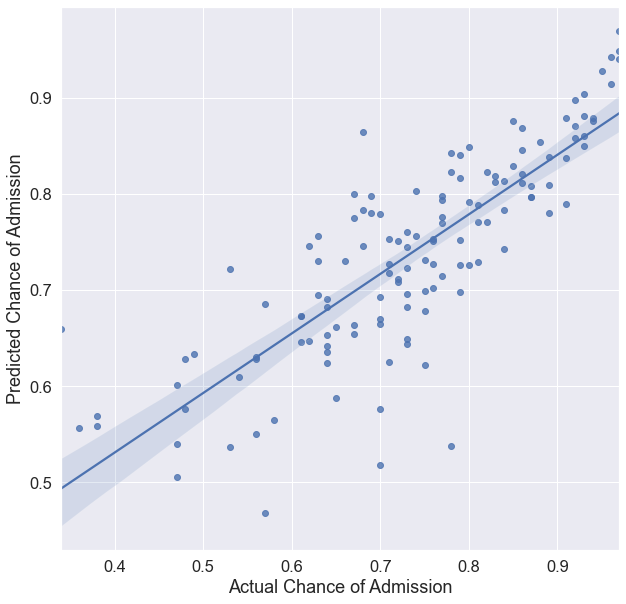

In [39]:
plt.figure(figsize=(10,10))
sns.regplot(x='Chance of Admit ', y='predicted admit', data=pred_act)
plt.xlabel('Actual Chance of Admission')
plt.ylabel('Predicted Chance of Admission');

### Check the Root Mean Squared Error
The RMSE tells us how far, on average, our predictions were mistaken. An RMSE of 0 would mean we were making perfect predictions.



In [40]:
round(rmse(pred_act['Chance of Admit '], pred_act['predicted admit']),4)

0.0807

### Using less data is less accurate
R Squared difference 0.99 vs. 0.98
RMSE difference 0.06 vs. 0.08